In [1]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mylibrary.nnlib as tnn

In [33]:
class ResidualConvex(tnn.Layer):
    
    def __init__(self, input_dim, hidden_dim, output_dim, optimizer):
        self.linear = tnn.LinearLayer(input_dim, output_dim, optimizer=optimizer)
        self.layer1 = tnn.LinearLayer(input_dim, hidden_dim, optimizer=optimizer)
        self.layer2 = tnn.LinearLayer(hidden_dim, output_dim, optimizer=optimizer)
        self.relu = tnn.Relu()
        
        self.linear.weights*=0.        
        
    def forward(self,inputs):
        self.layer2.weights = np.abs(self.layer2.weights)
        
        h = self.layer1.forward(inputs)
        h = self.relu.forward(h)
        h = self.layer2.forward(h)
        res = self.linear.forward(inputs)
        out = h + res
        return out
    
    def backward(self, del_output):
        dh = self.layer2.backward(del_output)
        dh = self.relu.backward(dh)
        dh = self.layer1.backward(dh)
        dx_ = self.linear.backward(del_output)
        dx = dh + dx_
        return dx
    
    def update(self):
        self.linear.update()
        self.layer1.update()
        self.layer2.update()       

### 1D Regression Dataset

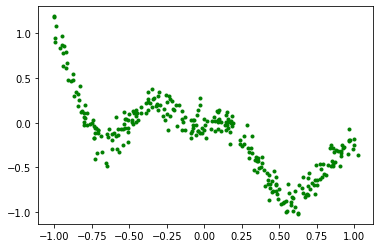

In [34]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
y = -y

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [35]:
optim = tnn.Adam(0.001)
net = ResidualConvex(1, 5, 1, optim)

In [36]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        ax.scatter(x, y, marker='.', color='g')
        ax.scatter(x, yout.reshape(-1), color='r', marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.0966956119739852


100 Error =  0.4026758848846539


200 Error =  0.18744521805128372


300 Error =  0.13009012131590286


400 Error =  0.11592672330439262


500 Error =  0.110510691005555


600 Error =  0.10666831673801044


700 Error =  0.10313328759966835


800 Error =  0.09973430083123974


900 Error =  0.09649610579096315


1000 Error =  0.09345654184985303


1100 Error =  0.09062933066168251


1200 Error =  0.08802826770488488


1300 Error =  0.08565318779730031


1400 Error =  0.08352255174631784


1500 Error =  0.0824588149925547


1600 Error =  0.08146341748461926


1700 Error =  0.0805071503636698


1800 Error =  0.07957730756038704


1900 Error =  0.07866638999112714


2000 Error =  0.07778734811400868


2100 Error =  0.07692301323701088


2200 Error =  0.07608636238912973


2300 Error =  0.07526482020418702


2400 Error =  0.07447312330871454


2500 Error =  0.07372145283926547


2600 Error =  0.07298400221962761


2700 Error =  0.07226375567757518


2800 Error

TclError: invalid command name "pyimage95"

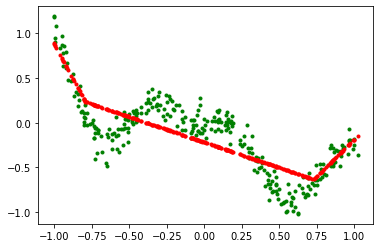

In [37]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, yout.reshape(-1), color='r', marker='.')

### 2D Regression Dataset

In [38]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
# X1 = np.linspace(-2.5, 0, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

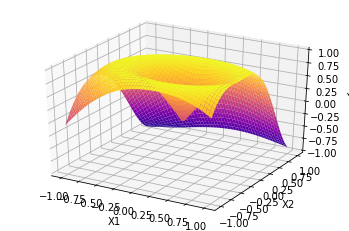

In [39]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
# Y = -Y

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [42]:
optim = tnn.Adam(0.01)
net = ResidualConvex(2, 15, 1, optim)

In [43]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = -net.forward(xx)
    dy = yout - yy
    dx = net.backward(-dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  6.175690007414905


100 Error =  0.10029537442063047


200 Error =  0.04686821245357776


300 Error =  0.03141648667745136


400 Error =  0.029302079651480573


500 Error =  0.02815369237878223


600 Error =  0.02731961081558705


700 Error =  0.026635172044092763


800 Error =  0.025966219771415434


900 Error =  0.025279770085886385


1000 Error =  0.02445723987302199


1100 Error =  0.024156709210967933


1200 Error =  0.023978056964782165


1300 Error =  0.023822234116615833


1400 Error =  0.023671371187826157


1500 Error =  0.023511758370592016


1600 Error =  0.023335031367441163


1700 Error =  0.023129778297701138


1800 Error =  0.02289061104205681


1900 Error =  0.022617348151714685


2000 Error =  0.022301984315452023


2100 Error =  0.021926105878714006


TclError: invalid command name "."

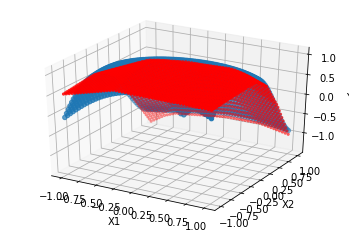

In [44]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## classification

In [45]:
from sklearn.datasets import make_moons

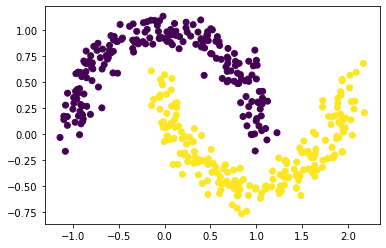

In [46]:
X, y = make_moons(n_samples=400, noise=0.1)
x1 = X[:,0]
x2 = X[:,1]

xx = X
yy = y.astype(float).reshape(-1,1)
%matplotlib inline
plt.scatter(x1, x2, c=y)

In [48]:
optim = tnn.Adam(0.01)
net = ResidualConvex(2, 15, 1, optim)

In [50]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = tnn.SigmoidCrossEntropyBinary.del_loss(yout, yy)
#     dy = tnn.CrossEntropyBinary.del_loss(yout, yy)
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = tnn.SigmoidCrossEntropyBinary.loss(yout, yy)
#         error = tnn.CrossEntropyBinary.loss(yout, yy)

        print(epoch, 'Error = ', error)
        
        out = (yout>0.5).astype(float)
        
        ax.clear()
        ax.scatter(x1, x2, c=y)
        ax.scatter(x1, x2, c=out.reshape(-1), marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.8381934373155022


100 Error =  0.5800282193231858


200 Error =  0.5788745362785925


300 Error =  0.5738094094436488


400 Error =  0.5683002559710725


500 Error =  0.5674632078503331


600 Error =  0.5673063801356534


700 Error =  0.5672688168872608


800 Error =  0.5671659101463926


900 Error =  0.5671548192393963


1000 Error =  0.5671296258077148


1100 Error =  0.5671037207701667


1200 Error =  0.567119888902681


1300 Error =  0.5670644482595162


1400 Error =  0.5669712184493941


1500 Error =  0.5669029133586964


1600 Error =  0.5670730294560875


1700 Error =  0.567016952231654


1800 Error =  0.5666782823562371


1900 Error =  0.5666668163225704


2000 Error =  0.5667117344654286


2100 Error =  0.5666953384828479


2200 Error =  0.5667532872257961


2300 Error =  0.5666592871649594


2400 Error =  0.5667860514040277


2500 Error =  0.5666523129650937


2600 Error =  0.5668953099560536


2700 Error =  0.5667532219159648


2800 Error =  0.5666163343830468



TclError: invalid command name "pyimage146"

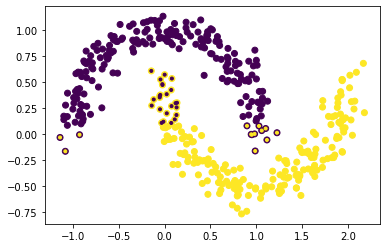

In [51]:
%matplotlib inline
plt.scatter(x1, x2, c=y)
plt.scatter(x1, x2, c=out.reshape(-1), marker='.')